In [ ]:
'''install stuff'''

!pip install --upgrade pip
!pip install tensorflow
!pip install keras
!pip install matplotlib

In [ ]:
'''import dataset & other stuff'''
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''split data from mnist'''
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
'''create model with 2 layers'''
network = models.Sequential()
'''layer 1'''
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
'''layer 2'''
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
'''define the model'''
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
'''transform from 3D to 2D for train and test data'''
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [ ]:
'''need to read on this...'''
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
'''fit the model on training'''
network.fit(train_images, train_labels, epochs = 5, batch_size=128)

In [ ]:
'''calc accuracy'''
test_loss , test_acc = network.evaluate(test_images, test_labels)


 Random Image selected from MNIST: 


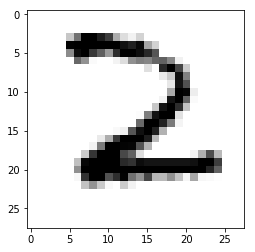

The predicted value from the model is:  2


In [16]:
'''get random image and predict the digit'''
(train2_images, train_labels), (test2_images, test2_labels) = mnist.load_data()
random_image = random.choice(train2_images[:])
plt.imshow(random_image, cmap=plt.cm.binary)
print('\n Random Image selected from MNIST: ')
plt.show()

random_image = random_image.reshape(28*28)
random_image = random_image.astype('float32') / 255


def prd(single_image):
    test = np.array([single_image])
    x = np.array([])
    x = network.predict(test, batch_size=None, verbose=0, steps=None)
    return x

print('The predicted value from the model is: ', np.argmax(prd(random_image)))